In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import fastai
fastai.__version__

'1.0.37'

In [3]:
from fastai import *
from fastai_audio import *

In [4]:
DATA = Path('data')
NSYNTH_AUDIO = DATA/'nsynth_audio' # contains train and valid folders

In [5]:
!ls tmp_labels

test_guitar_clean_40_88.csv     train_keyboard_clean_21_108.csv
test_keyboard_clean_21_108.csv  valid_guitar_clean_40_88.csv
train_guitar_clean_40_88.csv    valid_keyboard_clean_21_108.csv


In [6]:
LABEL_DIR = Path('tmp_labels')
GUITAR_TRN = LABEL_DIR/'train_guitar_clean_40_88.csv'
GUITAR_VAL = LABEL_DIR/'valid_guitar_clean_40_88.csv'
GUITAR_TST = LABEL_DIR/'test_guitar_clean_40_88.csv'

In [9]:
trn_df, val_df, tst_df = [pd.read_csv(CSV) for CSV in [GUITAR_TRN, GUITAR_VAL, GUITAR_TST]]
trn_df.head(2)

,note_str,pitch
0,guitar_acoustic_001-082-050,82
1,guitar_electronic_035-062-127,62


In [10]:
len(trn_df), len(val_df), len(tst_df)

(16915, 1112, 347)

In [17]:
trn_list, val_list, tst_list = [AudioItemList.from_df(df, path=NSYNTH_AUDIO, 
                                                      folder=folder, suffix='.wav')
                                for df, folder in zip([trn_df, val_df, tst_df], 
                                                      ['train', 'valid', 'test'])]
len(trn_list), len(val_list), len(tst_list)

(16915, 1112, 347)

In [28]:
data = (ItemLists(NSYNTH_AUDIO, trn_list, val_list)
            .label_from_df('pitch')
            .add_test(tst_list)
            .databunch())

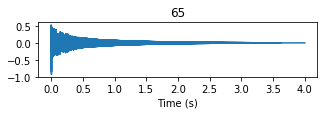

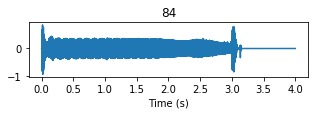

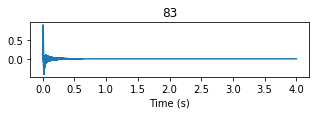

In [29]:
data.show_batch(3)

In [37]:
def first_second(x):
    return x[:16000]

In [39]:
xs, ys = data.one_batch()
xs.shape, ys.shape

(torch.Size([64, 64000]), torch.Size([64]))

In [44]:
tfm_list = [first_second]
tfms = (tfm_list, tfm_list) # train, valid tfms 

data = (ItemLists(NSYNTH_AUDIO, trn_list, val_list)
            .label_from_df('pitch')
            .add_test(tst_list)
            .transform(tfms)
            .databunch())
xs, ys = data.one_batch()
xs.shape, ys.shape

(torch.Size([64, 16000]), torch.Size([64]))

In [45]:
xs.min(), xs.max()

(tensor(-0.9959), tensor(0.9965))

In [49]:
n_fft = 512 
n_hop = 256
n_mels = 64
sample_rate = 16000
bs = 32

freq_tfms = get_frequency_batch_transforms(n_fft=n_fft,
                                           n_hop=n_hop,
                                           n_mels=n_mels,
                                           sample_rate=sample_rate)

In [57]:
tfm_list = [first_second]
tfms = (tfm_list, tfm_list) # train, valid tfms 

n_fft = 512 
n_hop = 256
n_mels = 64
sample_rate = 16000
ref = 'max'
top_db = 50.0
bs = 32

freq_tfms = get_frequency_batch_transforms(n_fft=n_fft,
                                           n_hop=n_hop,
                                           n_mels=n_mels,
                                           ref=ref,
                                           top_db=top_db,
                                           sample_rate=sample_rate)

data = (ItemLists(NSYNTH_AUDIO, trn_list, val_list)
            .label_from_df('pitch')
            .add_test(tst_list)
            .transform(tfms)
            .databunch(bs=bs, tfms=freq_tfms))
xs, ys = data.one_batch()
xs.shape, ys.shape, xs.min(), xs.max()

(torch.Size([32, 1, 64, 63]), torch.Size([32]), tensor(0.), tensor(1.))

In [54]:
data.c

48